In [2]:
rm(list = ls())
library(data.table)
library(ggplot2)

### Data Similation

https://kevinkotze.github.io/ts-2-tut/

[1] 312   3


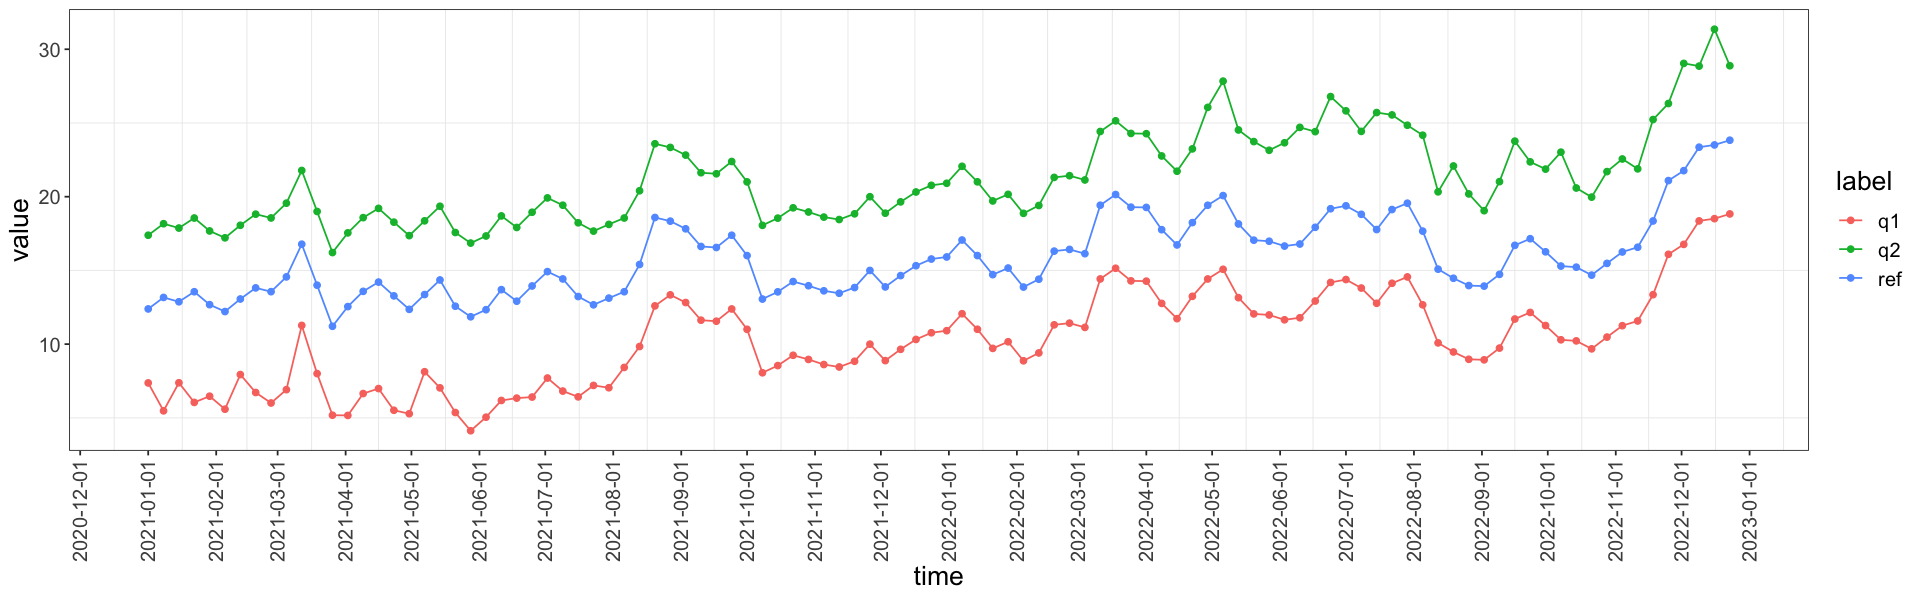

In [3]:
set.seed(20230525)

n_wk <- 104 # weeks in two years 
date_label <- seq(as.Date("2021/1/1"), by = "week", length.out = n_wk)
ts <- 10 + arima.sim(model = list(ar = 0.8, ma = 0.6), n = n_wk) + sqrt(1:n_wk)
e <- runif(n_wk, 0, 3)

dt_refer <- ts
dt_query1 <- c(ts[1:34] - 5 - e[1:34], 
               ts[35:69] - 5,
               ts[70:104] - 5)
dt_query2 <- c(ts[1:34] + 5, 
               ts[35:69] + 5,
               ts[70:104] + 5 + e[70:104])

dt <- data.table(time=rep(date_label, 3), label=c(rep(c("ref", "q1", "q2"), each=n_wk)), 
                 value=c(dt_refer, dt_query1, dt_query2))
                 
# Save the data
fwrite(dt, "data/testdata.csv")
print(dim(dt))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(data = dt, aes(x = time, y = value, color = label)) + 
  geom_point() + 
  geom_line() + 
  scale_x_date(breaks = "1 month") + 
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    axis.title = element_text(size = 16), axis.text = element_text(size = 12), 
    legend.title = element_text(size = 16), legend.text = element_text(size = 12),
    plot.background = element_blank(),
    panel.grid.major = element_blank()
  )